In [ ]:
pip install rasterio

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 22.2/22.2 MB 36.2 MB/s eta 0:00:00


In [ ]:
from google.colab import files
files.upload()  # This will prompt you to upload kaggle.json

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"hasmitakurre","key":"3dd34c5e4a084019e12c4be02200e172"}'}

In [ ]:
# Make a directory to store the Kaggle credentials
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

# Set permissions
!chmod 600 ~/.kaggle/kaggle.json

# Verify the Kaggle API is set up properly
!kaggle datasets list

ref                                                              title                                           size  lastUpdated          downloadCount  voteCount  usabilityRating  
---------------------------------------------------------------  ---------------------------------------------  -----  -------------------  -------------  ---------  ---------------  
valakhorasani/mobile-device-usage-and-user-behavior-dataset      Mobile Device Usage and User Behavior Dataset   11KB  2024-09-28 20:21:12          19424        410  1.0              
prajwaldongre/global-plastic-waste-2023-a-country-wise-analysis  Global Plastic Waste 2023: Country-wise Data     3KB  2024-10-31 11:34:47           1378         30  1.0              
yusufdelikkaya/online-sales-dataset                              Online Sales Dataset                             1MB  2024-10-29 10:08:40           1593         29  0.88235295       
mahdiehhajian/life-expectancy-around-the-world                   Life expectancy

In [ ]:
# Download the Caltech-256 dataset
!kaggle datasets download -d hasmitakurre/nasa-soil-moisture-india-dataset

Dataset URL: https://www.kaggle.com/datasets/hasmitakurre/nasa-soil-moisture-india-dataset
License(s): unknown
 82% 57.0M/69.3M [00:00<00:00, 78.0MB/s]
100% 69.3M/69.3M [00:00<00:00, 74.4MB/s]


In [ ]:
# Unzip the downloaded dataset
!unzip nasa-soil-moisture-india-dataset.zip -d /content/nasa-soil-moisture-india-dataset

unzip:  cannot find or open nasa-soil-moisture-india-dataset.zip, nasa-soil-moisture-india-dataset.zip.zip or nasa-soil-moisture-india-dataset.zip.ZIP.


In [ ]:
import rasterio
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import LinearSegmentedColormap
import os

# Define the custom color palette from visualization_params
colors = ['#fc6238', '#ffec59', '#8dd7bf', '#00b0ba', '#0065a2']
custom_cmap = LinearSegmentedColormap.from_list('custom_palette', colors)

# Load the .tif heatmap file
def load_tif_data(tif_file):
    with rasterio.open(tif_file) as src:
        data = src.read(1)  # Read the first band
    return data

# Specify the directory containing the .tif files
tif_folder_path = '/content/nasa-soil-moisture-india-dataset/NASA_Soil_Moisture_India_Dataset'

# List all .tif files in the specified folder
tif_files = [f for f in os.listdir(tif_folder_path) if f.endswith('.tif')]

# Loop through each .tif file and display the heatmap
for tif_file in tif_files:
    tif_file_path = os.path.join(tif_folder_path, tif_file)

    # Load heatmap data
    heatmap_data = load_tif_data(tif_file_path)

    # Show the heatmap with the custom colormap
    plt.figure(figsize=(10, 6))
    plt.imshow(heatmap_data, cmap=custom_cmap, vmin=0.0, vmax=0.5)  # Set vmin and vmax as in visualization_params
    plt.colorbar()
    plt.title(f"Soil Moisture Heatmap - {tif_file}")
    plt.axis('off')  # Optional: turn off axis labels
    plt.show()

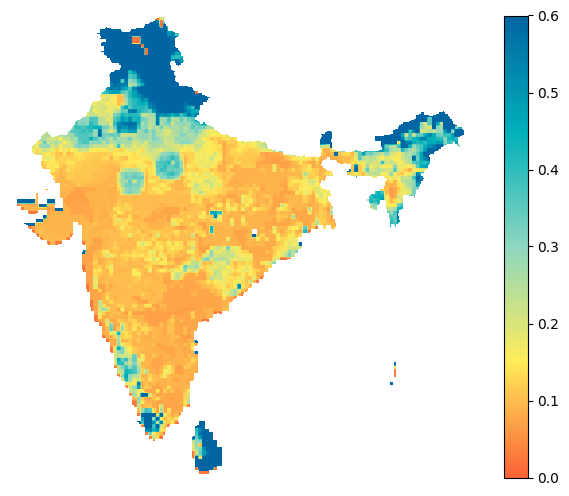

In [ ]:
import rasterio
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import LinearSegmentedColormap

# Define the custom color palette from visualization_params
colors = ['#fc6238', '#ffec59', '#8dd7bf', '#00b0ba', '#0065a2']
custom_cmap = LinearSegmentedColormap.from_list('custom_palette', colors)

# Load the .tif heatmap file
def load_tif_data(tif_file):
    with rasterio.open(tif_file) as src:
        data = src.read(1)  # Read the first band
    return data

# Example .tif file path
tif_file_path =  '/content/nasa-soil-moisture-india-dataset/NASA_Soil_Moisture_India_Dataset/soil_moisture_india_and_sri_lanka_2015-04-02.tif'  #'path_to_your_heatmap.tif'
heatmap_data = load_tif_data(tif_file_path)


# Show the heatmap with the custom colormap
plt.figure(figsize=(10, 6))
plt.imshow(heatmap_data, cmap=custom_cmap, vmin=0.0, vmax=0.6)  # Set vmin and vmax as in visualization_params
plt.colorbar()
plt.title(f"Soil Moisture Heatmap - {tif_file}")
plt.axis('off')  # Optional: turn off axis labels
plt.show()

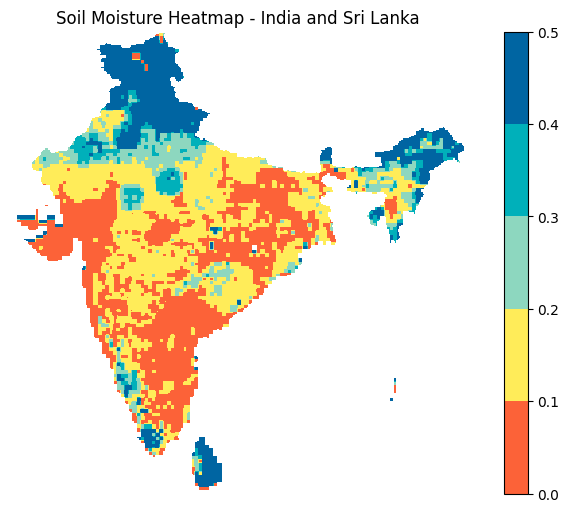

In [ ]:
import rasterio
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap, BoundaryNorm

# Define the exact six colors from visualization_params
#colors = ['#fc6238', '#ffec59', '#8dd7bf', '#00b0ba', '#0065a2', '#004b74']
colors = ['#fc6238', '#ffec59', '#8dd7bf', '#00b0ba', '#0065a2']
custom_cmap = ListedColormap(colors)

# Define boundaries for each color (e.g., six intervals from 0 to 0.6)
boundaries = [0.0, 0.1, 0.2, 0.3, 0.4, 0.5]
norm = BoundaryNorm(boundaries, custom_cmap.N, clip=True)

# Load the .tif heatmap file
def load_tif_data(tif_file):
    with rasterio.open(tif_file) as src:
        data = src.read(1)  # Read the first band
    return data

# Example .tif file path
tif_file_path = '/content/nasa-soil-moisture-india-dataset/NASA_Soil_Moisture_India_Dataset/soil_moisture_india_and_sri_lanka_2015-04-02.tif'
heatmap_data = load_tif_data(tif_file_path)

# Show the heatmap with the exact custom colormap
plt.figure(figsize=(10, 6))
plt.axis('off')  # Optional: turn off axis labels
plt.imshow(heatmap_data, cmap=custom_cmap, norm=norm)  # Apply the custom colormap and norm
plt.savefig("soil_moisture_heatmap.png", format="png", bbox_inches="tight", dpi=300)
plt.colorbar(boundaries=boundaries, ticks=boundaries)  # Display color bar with boundaries as tick marks
plt.title("Soil Moisture Heatmap - India and Sri Lanka")
plt.show()

In [ ]:
import rasterio
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import LinearSegmentedColormap
import os

# Define the custom color palette from visualization_params
colors = ['#fc6238', '#ffec59', '#8dd7bf', '#00b0ba', '#0065a2']
custom_cmap = LinearSegmentedColormap.from_list('custom_palette', colors)

# Define boundaries for each color (e.g., six intervals from 0 to 0.6)
boundaries = [0.0, 0.1, 0.2, 0.3, 0.4, 0.5]
norm = BoundaryNorm(boundaries, custom_cmap.N, clip=True)


# Create directories if they don't already exist
os.makedirs("/content/Raw_Data_Images/", exist_ok=True)

# Load the .tif heatmap file
def load_tif_data(tif_file):
    with rasterio.open(tif_file) as src:
        data = src.read(1)  # Read the first band
    return data

# Specify the directory containing the .tif files
tif_folder_path = '/content/nasa-soil-moisture-india-dataset/NASA_Soil_Moisture_India_Dataset'

# List all .tif files in the specified folder
tif_files = [f for f in os.listdir(tif_folder_path) if f.endswith('.tif')]

# Loop through each .tif file and display the heatmap
for tif_file in tif_files:
    tif_file_path = os.path.join(tif_folder_path, tif_file)

    # Load heatmap data
    heatmap_data = load_tif_data(tif_file_path)

    # Save the heatmap with the exact custom colormap
    plt.figure(figsize=(10, 6))
    plt.axis('off')  # Optional: turn off axis labels
    plt.imshow(heatmap_data, cmap=custom_cmap, norm=norm)  # Apply the custom colormap and norm
    plt.savefig(f'/content/Raw_Data_Images/{tif_file}.png', format="png", bbox_inches="tight", dpi=300)
    plt.close()

In [ ]:
import shutil

# Define the folder you want to zip and the name of the output zip file
folder_to_zip = '/content/Raw_Data_Images'  # Replace with your folder path
output_zip_file = '/content/Raw_Data_Images.zip'  # Replace with the desired output zip file path

# Use shutil to create a zip file
shutil.make_archive(output_zip_file.replace('.zip', ''), 'zip', folder_to_zip)

print(f'Folder {folder_to_zip} has been zipped into {output_zip_file}')

Folder /content/Raw_Data_Images has been zipped into /content/Raw_Data_Images.zip
